<a href="https://colab.research.google.com/github/MrVer0n/IVS/blob/main/IVS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Задание на 1 лабораторную работу.**

1. Найти тестовыую выборку на стоке. Поделить её на обучающую выборку и тестовую (любым методом).

  1.1 Определить входные и выходные переменные. Проанализировав.

  1.2 Задать функции принадлежности переменным (4 вида-стандартных) или 1-2 подходящих. Определить метод.

  1.3 Построить базу правил. Аппроксиматор - много входов, один выход.



*  Использовать метод полного перебора. На основе метода построить базу правил.
*  Выбрать методы инициализации для входных и выходного параметров (для системы нечётного вывода).

## **Установка библиотек, подготовка**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=003138007cd44721044811fa53e7d8fe90f56c994dc6eec27c559b15681963d0
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
import itertools
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from google.colab.data_table import DataTable
from skfuzzy import control as ctrl

##**1.1**

Входные переменные и их важность(степень влияния на выходную):

*   Quality of Sleep           0.883213
*   Age                        0.344709
*   Stress Level              -0.811023

Выходная переменная:

*   Sleep Duration             


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/ИВС/Sleep_health_and_lifestyle_dataset.csv', sep=',', encoding='cp1251')
DataTable.max_columns = 30
pd.set_option('display.max_columns', 30)
DataTable(df, include_index=False, num_rows_per_page=10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df['Age'].value_counts()

In [ ]:
missing_values = df.isnull().sum()
print("Пропущенные значения:")
print(missing_values)

Пропущенные значения:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


<ipython-input-5-f24e6440e4bb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


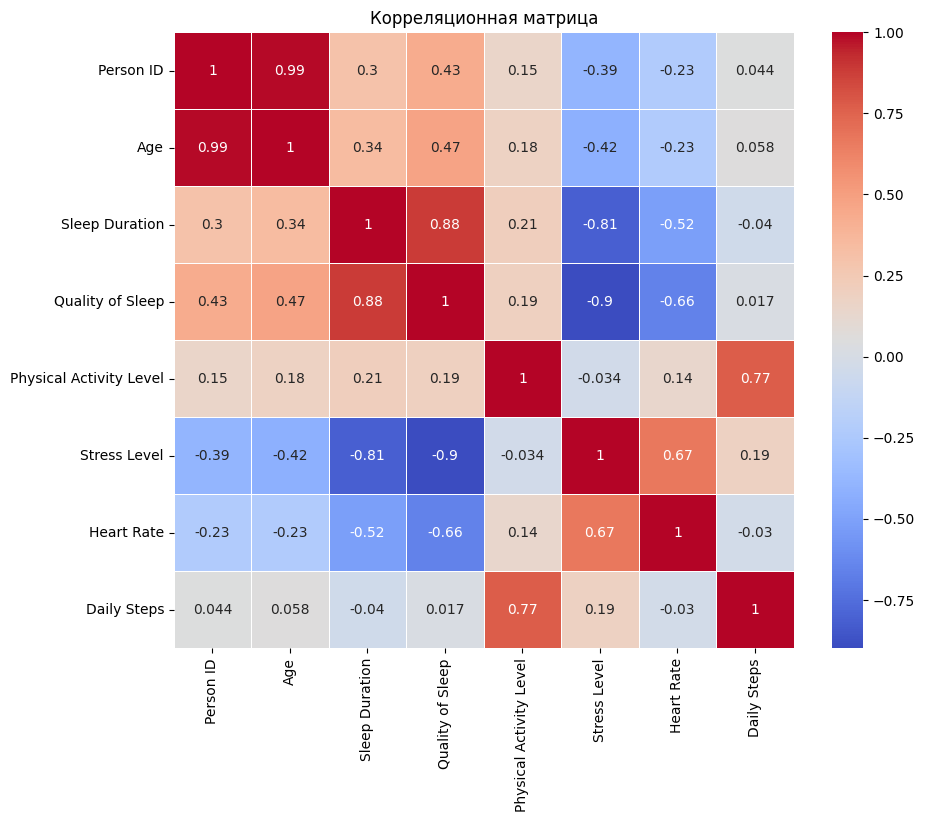

Наиболее влияющие факторы:
Sleep Duration             1.000000
Quality of Sleep           0.883213
Age                        0.344709
Person ID                  0.296305
Physical Activity Level    0.212360
Daily Steps               -0.039533
Heart Rate                -0.516455
Stress Level              -0.811023
Name: Sleep Duration, dtype: float64


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/ИВС/Sleep_health_and_lifestyle_dataset.csv')

correlation_matrix = data.corr()

# Матрица корреляции с использованием тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

# Корреляции между Основным и остальными признаками
correlations_with_potability = correlation_matrix['Sleep Duration'].sort_values(ascending=False)

print("Наиболее влияющие факторы:")
print(correlations_with_potability)

##**1.2**
Задаю функции принадлежности переменным. Определяю метод.

Выбрать методы инициализации для входных и выходного параметров (для системы нечётного вывода).

Метод - Такаги-Сугено (ТС):

Метод треугольных функций принадлежности.

Не использует функции принадлежности для определения выходного значения.
Вместо этого каждое правило имеет явно заданное выражение для определения выходного значения на основе активированных условий.
Дефаззификация в методе Такаги-Сугено выполняется непосредственно с помощью вычисления выходного значения на основе активированных правил и их выражений.

In [ ]:
# Загружаю данные
data = pd.read_csv('/content/gdrive/MyDrive/ИВС/Sleep_health_and_lifestyle_dataset.csv')

# Инициализируем переменную заключение (консеквент)
output = ctrl.Consequent(sorted(data['Sleep Duration']), 'output')

# Инициализируем переменные условия (антецедент)
age = ctrl.Antecedent(sorted(data['Age']), 'Age')
quality_of_sleep  = ctrl.Antecedent(sorted(data['Quality of Sleep']), 'Quality of Sleep')
stress_level = ctrl.Antecedent(sorted(data['Stress Level']), 'Stress Level')
#sleep_duration = ctrl.Antecedent(data['Sleep Duration'], 'Sleep Duration')

# Возмодность выбора ФП и коллисества термов
count_term = input(f"Input count of term: ")
insert_term_type = input(f"Input term type (triangular, trapezoidal, gaussian, sigmoid): ")
count_term = int(count_term)


# Определяю функций принадлежности метожом автоматической инициализации
#quality_of_sleep.automf(3)
#age.automf(3)
#physical_activity_level.automf(3)
#output.automf(3)

# Какие то графики
#age['average'].view()
#quality_of_sleep['average'].view()
#physical_activity_level['average'].view()

Input count of term: 3
Input term type (triangular, trapezoidal, gaussian, sigmoid): gaussian


## **1.3**
Строю базу правил.

Использую метод полного перебора.

In [ ]:
def generate_rule_base(variable_levels):
    variable_ranges = [range(levels) for levels in variable_levels]
    rule_base = list(itertools.product(*variable_ranges))
    return rule_base

# Количество уровней (термов) для соответствующей переменной [quality_of_sleep_levels, age_levels, physical_activity_levels, output]
# variable_levels = [3, 3, 3, 3] <- все переменные имеют 3 уровня

variable_levels = [count_term, count_term, count_term, count_term]
rule_base = generate_rule_base(variable_levels)

for rule in rule_base:
    print(f"IF Quality of Sleep level is {rule[0]}, Age level is {rule[1]}, and Physical Activity level is {rule[2]}, THEN Sleep Duration level is {rule[3]}")


Аппроксиматор - много входов, один выход.

Offset: -1.0, MSE(mean square error) : 0.646688904673372
Offset: -0.8, MSE(mean square error) : 0.6466675891555278
Offset: -0.6, MSE(mean square error) : 0.6467105263157888
Offset: -0.4, MSE(mean square error) : 0.6467105263157898
Offset: -0.2, MSE(mean square error) : 0.6469556155919806
Offset: -0.0, MSE(mean square error) : 0.64671059701046
Offset: 0.2, MSE(mean square error) : 0.6466347772711927
Offset: 0.4, MSE(mean square error) : 0.6468190247521728
Offset: 0.6, MSE(mean square error) : 0.6467908586137416
Offset: 0.8, MSE(mean square error) : 0.6464878959359921
Offset: 0, MSE(mean square error) : 0.6464878959359921


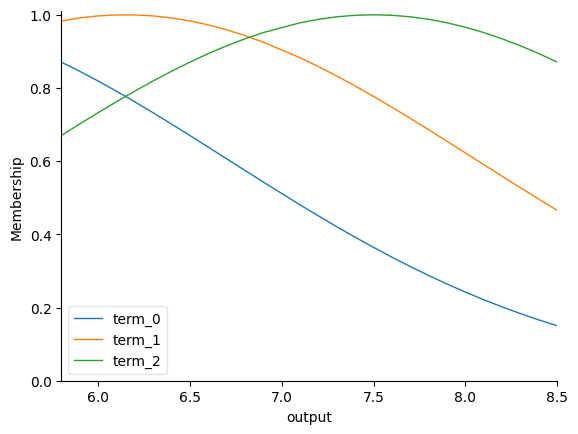

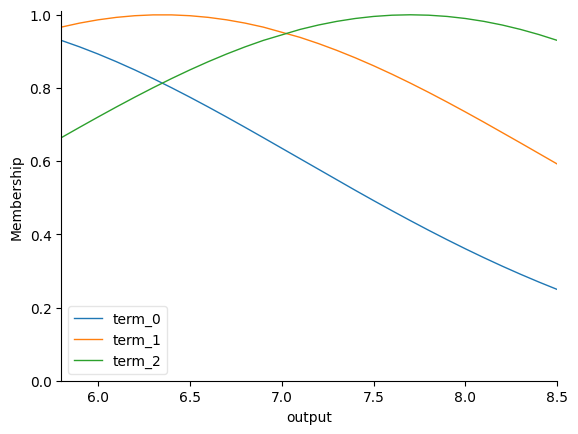

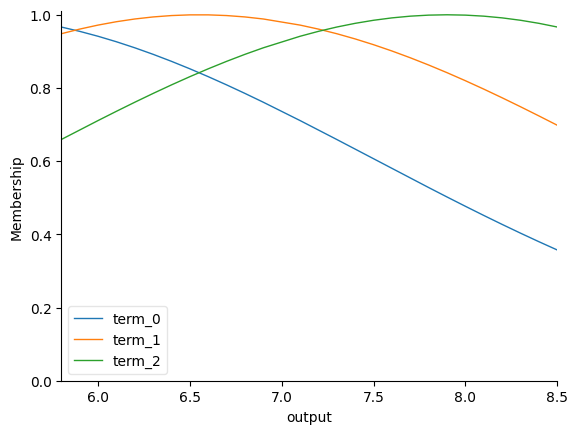

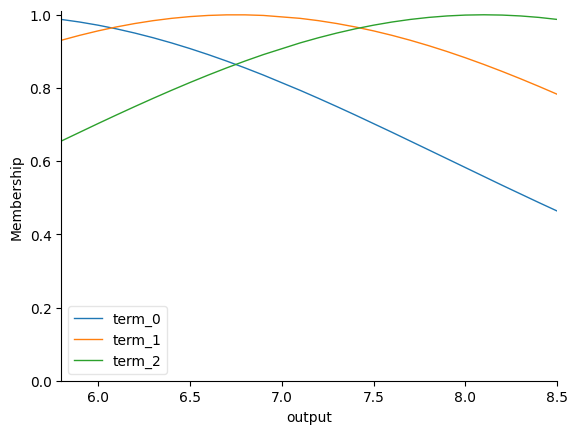

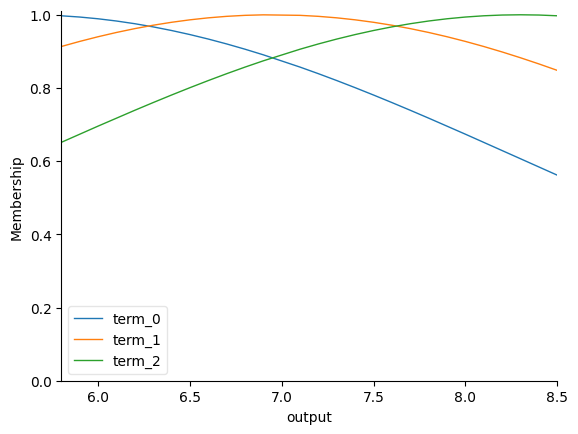

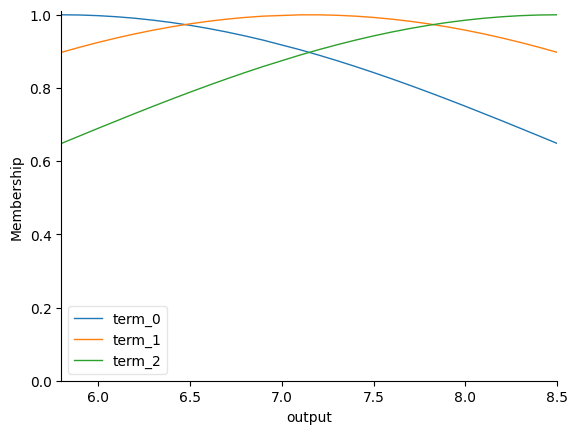

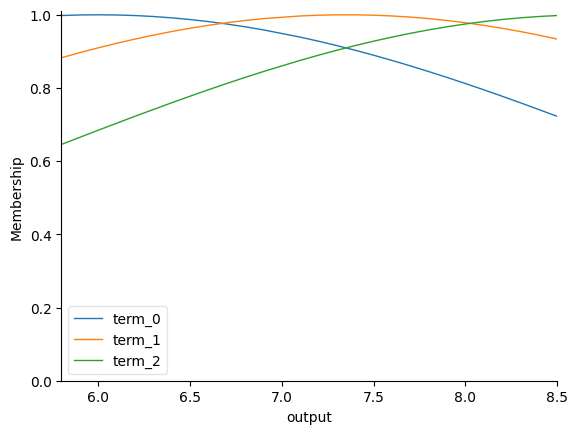

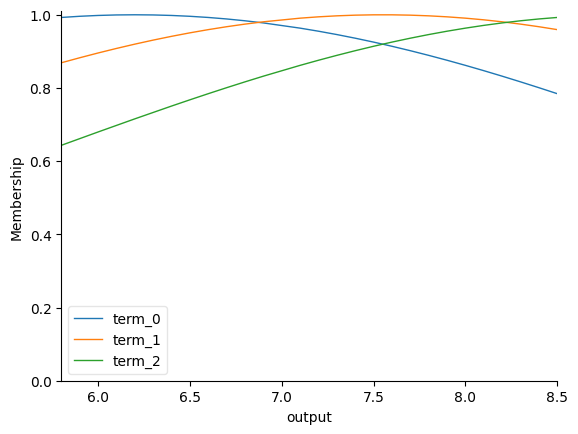

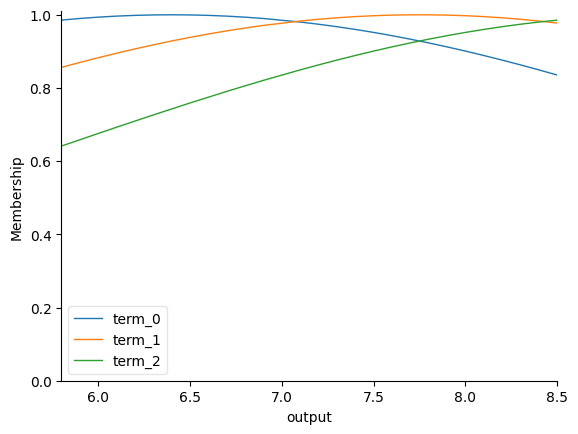

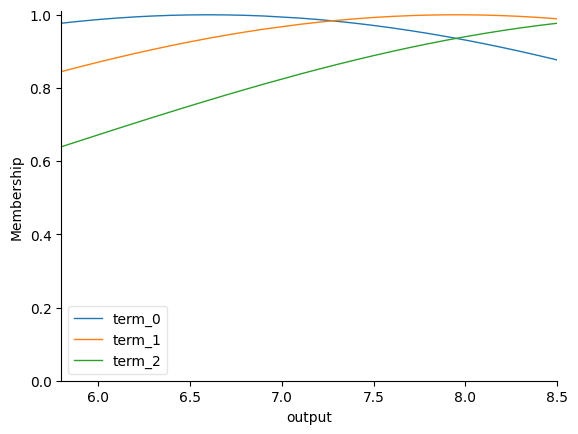

In [ ]:
# Тест набор
data_test = pd.read_csv('/content/gdrive/MyDrive/ИВС/Sleep_health_and_lifestyle_dataset_test.csv')
mse_result = 100
offset_result = 0
# Определяю функций принадлежности метожом ручной инициализации
def configure_variable(variable, num_terms, term_type, x):
    variable.terms = {}
    universe = variable.universe
    term_spacing = universe.ptp() / (num_terms - 1)
    if term_type == 'trapezoidal':
      term_spacing = (universe.ptp() / (num_terms + (num_terms/2)))

    for i in range(num_terms):
        term_name = f'term_{i}'
        if term_type == 'triangular':
            #if flag == 0:
            variable[term_name] = fuzz.trimf(universe, [ min(universe) + ((i-1) * term_spacing) + x, min(universe) + ((i) * term_spacing) + x, min(universe) + ((i+1) * term_spacing) + x])
            #elif flag == 1:
                #original_array = np.array(universe)
                #reversed_array = np.flip(original_array)
                #variable[term_name] = fuzz.trimf(reversed_array, [ min(universe) + ((i-1) * term_spacing), min(universe) + ((i) * term_spacing), min(universe) + ((i+1) * term_spacing)])
            #variable[term_name] = fuzz.trimf(universe, [i * term_spacing, i * term_spacing, (i * term_spacing) + term_spacing])
        elif term_type == 'trapezoidal':
            tMin = min(universe)+(i * term_spacing)
            variable[term_name] = fuzz.trapmf(universe, [tMin + ((i-1)* term_spacing) + x, tMin + ((i)* term_spacing) + x, tMin + ((i+1)* term_spacing) + x, tMin + ((i+2)* term_spacing) + x])
        elif term_type == 'gaussian':
            variable[term_name] = fuzz.gaussmf(universe, min(universe) + ((i) * term_spacing) + x, (min(universe)/2) + x)
        elif term_type == 'sigmoid':
            variable[term_name] = fuzz.smf(universe, min(universe) + ((i-1) * term_spacing) + x, min(universe) + ((i) * term_spacing) + x)

for x in np.arange(-1, 1, 0.2):
    x = round(x, 2)
    #flag = 0
    configure_variable(age, count_term, insert_term_type, x)
    configure_variable(quality_of_sleep, count_term, insert_term_type, x)
    configure_variable(stress_level, count_term, insert_term_type, x)
    #flag = 1
    configure_variable(output, count_term, insert_term_type, x)

    #age.view()
    #quality_of_sleep.view()
    #stress_level.view()
    output.view()

    # Строю базы правил
    rules = []
    for rule in rule_base:
    #input_conditions, output_value = rule
        rules.append(ctrl.Rule(quality_of_sleep[f"term_{rule[0]}"] & age[f"term_{rule[1]}"] & stress_level[f"term_{rule[2]}"], output[f"term_{rule[3]}"]))

# Система управления
    system = ctrl.ControlSystem(rules)
# Симулятор
    simulator = ctrl.ControlSystemSimulation(system)

    for_precision_true = []
    for_precision_pred = []

    for idx, row in data_test.iterrows():
        simulator.input['Quality of Sleep'] = row['Quality of Sleep']
        simulator.input['Age'] = row['Age']
        simulator.input['Stress Level'] = row['Stress Level']
        try:
            simulator.compute()
        except Exception:
            pass
        predicted_paymentTier = simulator.output['output']
        for_precision_true.append(data_test['Sleep Duration'][idx])
        for_precision_pred.append(predicted_paymentTier)
    #print(f"Predicted: {predicted_paymentTier:.1f}, Actual : {data_test['Sleep Duration'][idx]}")
    mse = mean_squared_error(for_precision_true, for_precision_pred)
    if mse_result > mse:
        mse_result = mse
        offset_resulr = x
    print(f"Offset: {x}, MSE(mean square error) : {mse}")

print(f"Offset: {offset_result}, MSE(mean square error) : {mse_result}")